In [1]:
import pickle

from station_hr_model import *
from inference import *
from criticism import *


In [2]:
with open('data/demand_sample.pickle', 'rb') as f:
    data_samp = pickle.load(f)


#global features
data, features = feature_generation(data_samp)

p = station_hr_ZIP_model(features, data)


svi_posterior = get_svi_posterior(data['data'], data['demand'],
                                model = p.model,
                                  guide = p.guide,
                                  filename='models/nihaar_model/svi_zip_params.pkl')

In [23]:
features

{'station': {'names': array(['station_2', 'station_3', 'station_4', 'station_5', 'station_6',
         'station_7', 'station_8', 'station_9', 'station_10', 'station_11',
         'station_12', 'station_13', 'station_14', 'station_16',
         'station_21', 'station_22', 'station_23', 'station_24',
         'station_25', 'station_26', 'station_27', 'station_28',
         'station_29', 'station_30', 'station_31', 'station_32',
         'station_33', 'station_34', 'station_35', 'station_36',
         'station_37', 'station_38', 'station_39', 'station_41',
         'station_42', 'station_45', 'station_46', 'station_47',
         'station_48', 'station_49', 'station_50', 'station_51',
         'station_54', 'station_55', 'station_56', 'station_57',
         'station_58', 'station_59', 'station_60', 'station_61',
         'station_62', 'station_63', 'station_64', 'station_65',
         'station_66', 'station_67', 'station_68', 'station_69',
         'station_70', 'station_71', 'station_72',

In [3]:
svi_posterior.information_criterion()


OrderedDict([('waic', tensor(13693.2158, grad_fn=<SumBackward0>)),
             ('p_waic', tensor(585.1359, grad_fn=<SumBackward0>))])

In [21]:
post_samples = posterior_samples(
    p.wrapped_model,
    svi_posterior,
    data,
    ['obs','prediction'],
    num_samples=100 )

In [32]:
svi_samples = {site: EmpiricalMarginal(svi_posterior, sites=site)
                     .enumerate_support().detach().cpu().numpy()
               for site in ['station_2hour_6','station_2hour_0','station_70hour_6']}

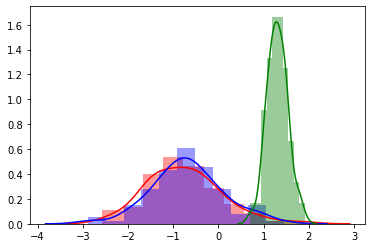

In [34]:
sns.distplot(svi_samples['station_2hour_0'],color='red')
sns.distplot(svi_samples['station_2hour_6'],color='blue')
sns.distplot(svi_samples['station_70hour_6'],color='green')

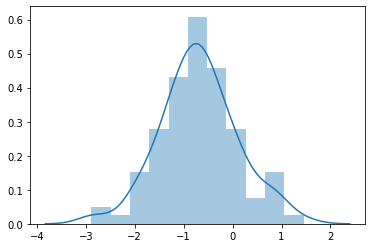

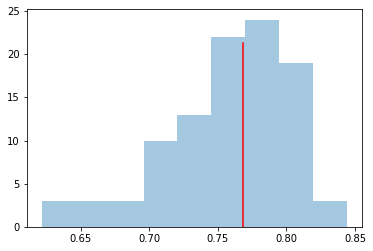

In [16]:
compare_test_statistic(data_samp.demand.values, post_samples[:,1,:],
                           stat=perc_0)

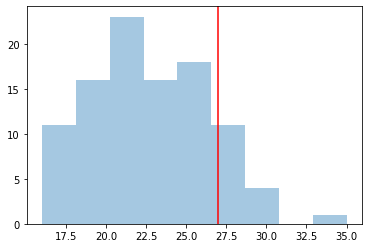

In [17]:
compare_test_statistic(data_samp.demand.values, post_samples[:, 1, :],
                       stat=max)

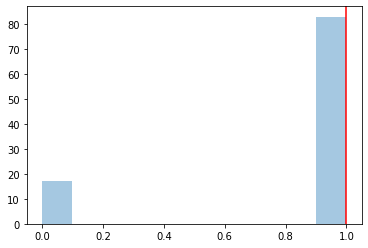

In [18]:
    compare_test_statistic(data_samp.demand.values, post_samples[:, 1, :],
                           stat=percentile, q=80)